# Introduction

The **Cyclistic** is a fiction bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, we want to understand how casual riders and annual members use Cyclistic bikes differently. Then, the goal is to design a new marketing strategy to convert casual riders into annual members.

# Business Question

**How Does a Bike-Share Navigate Speedy Success?**

How we can convert casual riders into anual members?

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Data Preparation

We will use the Cyclistic's historical trip data to analyze and identify trends. The dataset is available to download [here](https://divvy-tripdata.s3.amazonaws.com/index.html). For this project we only use the 2019 dataset. The 2019 dataset is divided into four quarters. Let's read each quarter first and have a quick snick peek!

In [3]:
#Reading quarter 1
q1 = pd.read_csv('Divvy_Trips_2019_Q1.csv')

In [4]:
q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [5]:
#Reading quarter 2
q2 = pd.read_csv('Divvy_Trips_2019_Q2.csv')

In [6]:
q2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [7]:
#Reading quarter 3
q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')

In [8]:
q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [9]:
#Reading quarter 4
q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [10]:
q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


Each quarter is loaded in different dataframe, q1, q2, q3 and q4. We can quickly notice that the column names of q2 is different that the other three. So, we need to fix it before merging all the dataframes.

In [11]:
#Changing the quarter 2 column names
q2 = q2.rename(columns={'01 - Rental Details Rental ID' : 'trip_id',
                        '01 - Rental Details Local Start Time' : 'start_time',
                        '01 - Rental Details Local End Time' : 'end_time',
                        '01 - Rental Details Bike ID' : 'bikeid',
                        '01 - Rental Details Duration In Seconds Uncapped' : 'tripduration',
                        '03 - Rental Start Station ID' : 'from_station_id',
                        '03 - Rental Start Station Name' : 'from_station_name',
                        '02 - Rental End Station ID' : 'to_station_id',
                        '02 - Rental End Station Name' : 'to_station_name',
                        'User Type' : 'usertype',
                        'Member Gender' : 'gender',
                        '05 - Member Details Member Birthday Year' : 'birthyear'})

In [12]:
q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


Now we can merge all the four dataframes together **(q1 + q2 + q3 + q4)**.

In [13]:
#Merging all four quarters
data = pd.concat([q1,q2,q3,q4])

In [14]:
data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [15]:
data.shape

(3818004, 12)

It shows that we have **3818004 rows** and **12 columns**. Let's see what columns we have in this dataset!

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 378.7+ MB


In [17]:
data.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [18]:
#converting the start_time from object to string
data['start_time'] = data['start_time'].astype("string")

In [19]:
#converting the end_time from object to string
data['end_time'] = data['end_time'].astype("string")

**start_time** and **end_time** columns have the date and time attached together. It would be a good idea to separate the date and time and have them in individual columns in order to make the further analysis easier.

In [20]:
#separating the date and time from the start_time column
start = data["start_time"].str.split(" ", n = 1, expand = True)
data["s_date"] = start[0]
data["s_time"] = start[1]

In [21]:
#separating the date and time from the end_time column
end = data["end_time"].str.split(" ", n = 1, expand = True)
data["e_date"] = end[0]
data["e_time"] = end[1]

In [22]:
data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,s_date,s_time,e_date,e_time
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,2019-01-01,00:04:37,2019-01-01,00:11:07
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,2019-01-01,00:08:13,2019-01-01,00:15:34
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,2019-01-01,00:13:23,2019-01-01,00:27:12
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,2019-01-01,00:13:45,2019-01-01,00:43:28
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,2019-01-01,00:14:52,2019-01-01,00:20:56


Now that we separated the start and end date and time, we can drop the start_time and end_time columns.

In [23]:
#Dropping two unwanted columns
data = data.drop(['start_time','end_time'], axis=1)

In [24]:
data.head()

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,s_date,s_time,e_date,e_time
0,21742443,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,2019-01-01,00:04:37,2019-01-01,00:11:07
1,21742444,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,2019-01-01,00:08:13,2019-01-01,00:15:34
2,21742445,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,2019-01-01,00:13:23,2019-01-01,00:27:12
3,21742446,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,2019-01-01,00:13:45,2019-01-01,00:43:28
4,21742447,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,2019-01-01,00:14:52,2019-01-01,00:20:56


**tripduration** is in second. So it will be a good idea to convert that to minutes.

In [25]:
#converting the tripduration from object to string
data['tripduration'] = data['tripduration'].astype("string")

In [26]:
#removing ',' between the numbers
data['tripduration'] = data['tripduration'].str.replace(',' , "")

In [27]:
#converting the tripduration from string to float
data['tripduration'] = data['tripduration'].astype("float")

In [28]:
#generating a new column called 'duration' in minutes
data['duration'] = round(data['tripduration'] / 60)

In [29]:
#Dropping the tripduration columns
data = data.drop(['tripduration'], axis=1)

In [30]:
data.head()

,trip_id,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,s_date,s_time,e_date,e_time,duration
0,21742443,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,2019-01-01,00:04:37,2019-01-01,00:11:07,6.0
1,21742444,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,2019-01-01,00:08:13,2019-01-01,00:15:34,7.0
2,21742445,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,2019-01-01,00:13:23,2019-01-01,00:27:12,14.0
3,21742446,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,2019-01-01,00:13:45,2019-01-01,00:43:28,30.0
4,21742447,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,2019-01-01,00:14:52,2019-01-01,00:20:56,6.0


As we are only working on the year **2019**, let's drop the **2019-** from the **s_date** and **e_date** columns.

In [31]:
#removing '2019_' from the s_date and e_date columns.
data['s_date'] = data['s_date'].str.replace('2019-' , "")
data['e_date'] = data['e_date'].str.replace('2019-' , "")

In [32]:
data.head()

,trip_id,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,s_date,s_time,e_date,e_time,duration
0,21742443,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,01-01,00:04:37,01-01,00:11:07,6.0
1,21742444,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,01-01,00:08:13,01-01,00:15:34,7.0
2,21742445,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,01-01,00:13:23,01-01,00:27:12,14.0
3,21742446,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,01-01,00:13:45,01-01,00:43:28,30.0
4,21742447,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,01-01,00:14:52,01-01,00:20:56,6.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 704053
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   bikeid             int64  
 2   from_station_id    int64  
 3   from_station_name  object 
 4   to_station_id      int64  
 5   to_station_name    object 
 6   usertype           object 
 7   gender             object 
 8   birthyear          float64
 9   s_date             string 
 10  s_time             string 
 11  e_date             string 
 12  e_time             string 
 13  duration           float64
dtypes: float64(2), int64(4), object(4), string(4)
memory usage: 436.9+ MB


**birthyear** does not need to be a float number, so let's convert that to an integer value!

In [34]:
data.head()

,trip_id,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,s_date,s_time,e_date,e_time,duration
0,21742443,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,01-01,00:04:37,01-01,00:11:07,6.0
1,21742444,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,01-01,00:08:13,01-01,00:15:34,7.0
2,21742445,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,01-01,00:13:23,01-01,00:27:12,14.0
3,21742446,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,01-01,00:13:45,01-01,00:43:28,30.0
4,21742447,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,01-01,00:14:52,01-01,00:20:56,6.0


We are getting close to have a clean and organized data. Let's see if there is any **Null** Value!

In [35]:
data.isnull().any()

trip_id              False
bikeid               False
from_station_id      False
from_station_name    False
to_station_id        False
to_station_name      False
usertype             False
gender                True
birthyear             True
s_date               False
s_time               False
e_date               False
e_time               False
duration             False
dtype: bool

Based on the above result, there are some null values under the gender and birthyear features.

In [36]:
data.isnull().sum()

trip_id                   0
bikeid                    0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               559206
birthyear            538751
s_date                    0
s_time                    0
e_date                    0
e_time                    0
duration                  0
dtype: int64

Nearly half a million rows of our dataset (aroound 15%) contain null values. As our main focus in this project is about **customers**, we are not going to remove any of the missing values and every single row is important for us. Instead, we are going to fill the missing values with 'unknown' label.

In [37]:
#replacing the null vlues under the gender feature with an 'unknown' label
data['gender'] = data['gender'].fillna('unknown')

In [38]:
#replacing the null vlues under the birthyear feature with an 'unknown' label
data['birthyear'] = data['birthyear'].fillna('unknown')

In [39]:
#now we confirm that there is no null values
data.isnull().sum()

trip_id              0
bikeid               0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
s_date               0
s_time               0
e_date               0
e_time               0
duration             0
dtype: int64

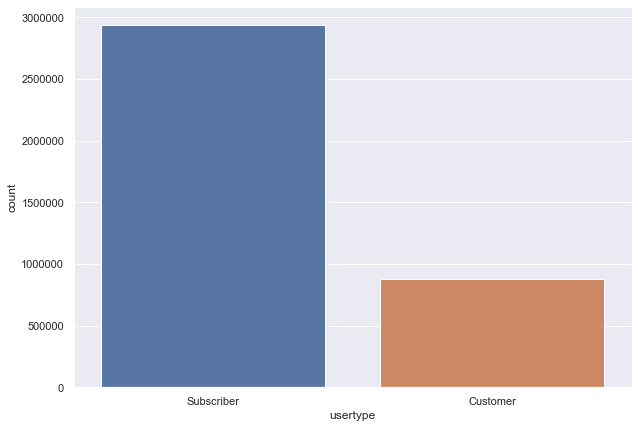

In [40]:
#let's look at the usertype
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x='usertype', data = data)

In [41]:
#Let's see the distribution of "usertype" feature

data.usertype.value_counts(normalize = True)

Subscriber    0.769346
Customer      0.230654
Name: usertype, dtype: float64

Nearly **77%** of the customers are **Subscribed** users and **23%** of them are guest. The goal is to reduce the number of guest customers and turn them to subscribers.

In [42]:
data.gender.value_counts(normalize = True)

Male       0.628815
Female     0.224719
unknown    0.146466
Name: gender, dtype: float64

Nearly **63%** of customers are male, **22%** are female and **15%** of them didn't specify their gender. 

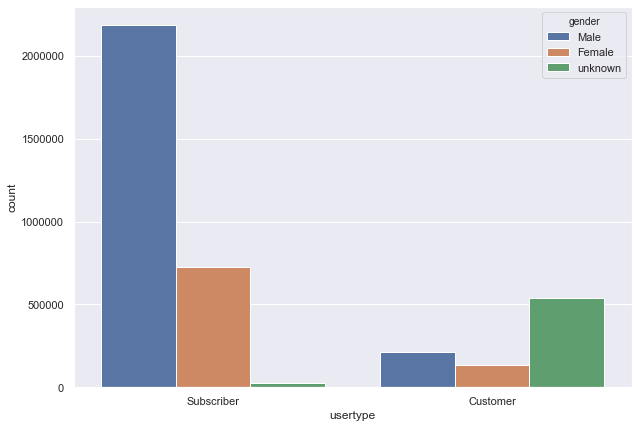

In [43]:
sns.countplot(x ='usertype', data = data, hue = 'gender')

This is not a balanced dataset as the population of males and females are not equal. However, the number of customers, who didn't specify their gender is under the guest categories. It might be because they didn't go through the subscribtion forms and procedures or the Cyclistic doesn't have other options beside male and female on the forms to choose.

In order to simplify the further analysis, the 'duration' feature is divided into four different categories: A, B, C and D as described below:

A = duration > 60 minutes<br>
B = 30 < duration <= 60<br>
C = 15 < duration <= 30<br>
D = duration <= 15

In [44]:
def duration_transform(duration):
    if duration <= 15 : return 'D'
    elif 15 < duration <= 30 : return 'C'
    elif 30 < duration <= 60 : return 'B'
    elif duration > 60 : return 'A'


data["duration_grade"] = data['duration'].map(duration_transform)

In [45]:
data.head()

,trip_id,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,s_date,s_time,e_date,e_time,duration,duration_grade
0,21742443,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,01-01,00:04:37,01-01,00:11:07,6.0,D
1,21742444,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,01-01,00:08:13,01-01,00:15:34,7.0,D
2,21742445,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,01-01,00:13:23,01-01,00:27:12,14.0,D
3,21742446,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,01-01,00:13:45,01-01,00:43:28,30.0,C
4,21742447,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,01-01,00:14:52,01-01,00:20:56,6.0,D


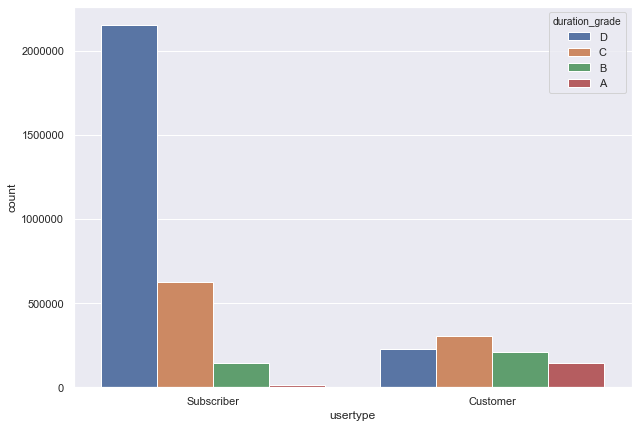

In [46]:
sns.countplot(x ='usertype', data = data, hue = 'duration_grade')

Above plot shows that most of the subscribed riders use the service for their daily commute and their rides only take less than 30 minutes. The duration_grade of gust customers are very close with each other. The Cyclistic can encourage the guest customers to suscribe with special promotions such as royalty cards and discounts. 

Now, let's extract the month from the date column and see the riders activities in each month!

In [47]:
def firstN(s_date, n=2):
    return s_date[:n]

data["month"] = data['s_date'].map(firstN)

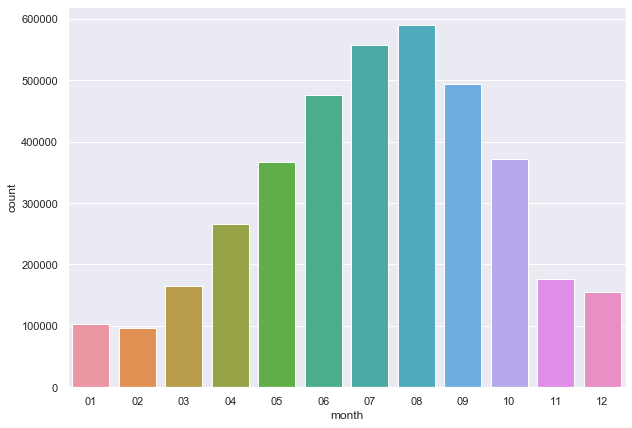

In [48]:
sns.countplot(x ='month', data = data)

Let's group the month in seasons!

In [49]:
def month_transform(month):
    if month == '12' or month == '01' or month == '02' : return 'winter'
    elif month == '03' or month == '04' or month == '05' : return 'spring'
    elif month == '06' or month == '07' or month == '08' : return 'summer'
    elif month == '09' or month == '10' or month == '11' : return 'fall'
    
data["season"] = data['month'].map(month_transform)

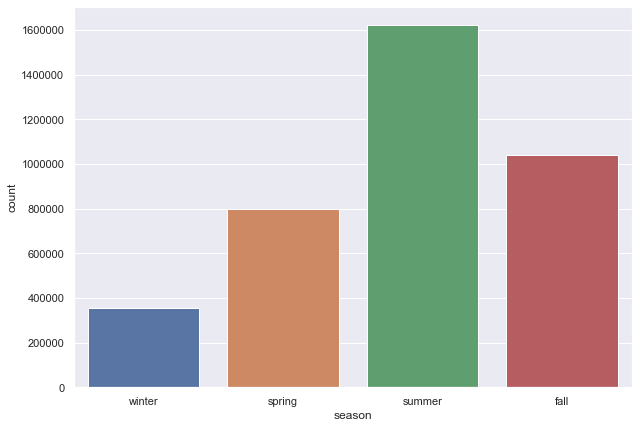

In [50]:
sns.countplot(x ='season', data = data)

Above plot shows that the number of riders is higher in summer and lower in winter. It totally make sense based on the weather in Chicago.

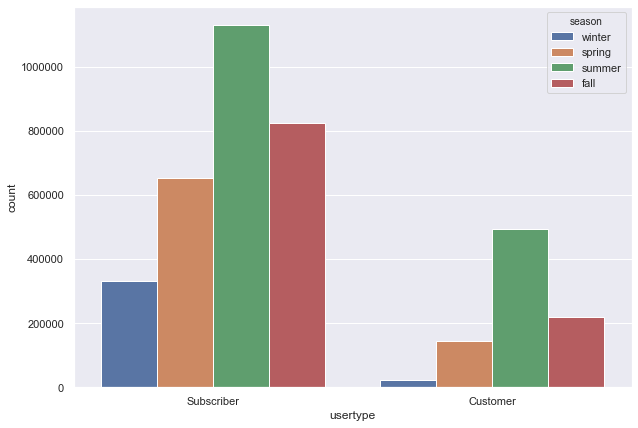

In [51]:
sns.countplot(x ='usertype', data = data, hue = 'season')

The number of guest riders is higher in summer and it could be the population of tourists.

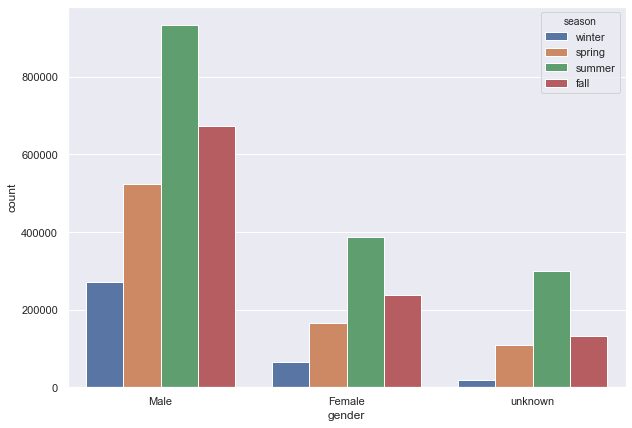

In [52]:
sns.countplot(x ='gender', data = data, hue = 'season')

We could have a better analysis if we knew, where the guest customers are from. By knowing that, we could say confidently that this group of riders are tourists and the other group of riders are local. So, we could focus on the local casual riders and encourage them to subscribe by providing loyalty cards, promotions and etc. 